In [1]:
import os

# Set your desired working folder path
working_folder = r"C:\Users\shash\Downloads"

# Set the working directory
os.chdir(working_folder)

# Verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\shash\Downloads


In [2]:
import pandas as pd

# Load the uploaded EpiClim dataset
file_path = "final_datav1.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8985 non-null   int64  
 1   week_of_outbreak  8985 non-null   object 
 2   state_ut          8985 non-null   object 
 3   district          8985 non-null   object 
 4   Disease           8985 non-null   object 
 5   Cases             8985 non-null   object 
 6   Deaths            2554 non-null   float64
 7   day               8985 non-null   int64  
 8   mon               8985 non-null   int64  
 9   year              8985 non-null   int64  
 10  Latitude          8985 non-null   float64
 11  Longitude         8985 non-null   float64
 12  preci             8849 non-null   float64
 13  LAI               6790 non-null   float64
 14  Temp              8047 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.0+ MB


In [3]:
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [4]:
df.dtypes

Unnamed: 0            int64
week_of_outbreak     object
state_ut             object
district             object
Disease              object
Cases                object
Deaths              float64
day                   int64
mon                   int64
year                  int64
Latitude            float64
Longitude           float64
preci               float64
LAI                 float64
Temp                float64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
count,8985.000000,2554.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8849.000000,6790.000000,8047.000000
mean,4492.000000,1.584573,15.423150,6.985865,2014.655426,20.623102,80.113904,0.462125,10.907143,304.519531
std,2593.890418,5.389499,8.871505,2.687808,3.354520,5.873265,5.698627,0.628652,7.920346,6.980089
min,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000
25%,2246.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.023705,5.000000,300.602000
50%,4492.000000,1.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.445000
75%,6738.000000,1.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.672831,14.000000,308.590000
max,8984.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000


In [6]:
## Total of 8985 records in the table

In [7]:
total_entries = len(df)
print("Total entries:", total_entries)

Total entries: 8985


In [8]:
### Missing values
df.isna().sum()

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

In [9]:
## If a missing death count implies zero deaths
df['Deaths'] = df['Deaths'].fillna(0).astype(int)

In [10]:
### Drop Redundant Columns
## Unnamed: 0 appears to be an index placeholder. Drop it:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
### Cases: convert to integer, coercing errors to NaN, then address any leftovers:
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce').fillna(0).astype(int)

In [12]:
# Remove non-numeric characters and extract the week number
df['week_of_outbreak'] = df['week_of_outbreak'].str.extract(r'(\d+)')

# Convert to integer type
df['week_of_outbreak'] = df['week_of_outbreak'].astype(int)

In [13]:
## List all disease types
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'Malaria' 'Acute Encephalitis Syndrome'
 'Acute Gastroenteritis' 'Dengue' 'pyrexia of unknown origin'
 'Chikungunya' 'Cholera' 'Malaria (PV)' 'Dengue Fever' 'Suspected Dengue'
 'Dengue Chikungunya' 'Dengue And Chikungunya' 'Suspected Cholera'
 'Diarrhea' 'Suspected Chikungunya' 'Suspected Dengue And Chikungunya'
 'Gastroenteritis' 'Dengue And Malaria' 'Dengue/Chikungunya'
 'Chikungunya/Dengue' 'Chikungunya/ Dengue']


In [14]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Acute Diarrhoeal Disease            5126
Dengue                              1619
Chikungunya                          731
Cholera                              666
Malaria                              544
Acute Encephalitis Syndrome          111
Acute Gastroenteritis                100
Dengue And Chikungunya                53
Suspected Dengue                      14
Dengue/Chikungunya                     3
Dengue And Malaria                     3
Suspected Chikungunya                  3
Dengue Fever                           2
Suspected Cholera                      2
Gastroenteritis                        1
Chikungunya/Dengue                     1
Dengue Chikungunya                     1
Suspected Dengue And Chikungunya       1
Diarrhea                               1
Malaria (PV)                           1
pyrexia of unknown origin              1
Chikungunya/ Dengue                    1
Name: Disease, dtype: int64


In [15]:
# List of values to replace all mosquitoe borned disease with single disease type
replace_values = [
    "Malaria (PV)",
    "Dengue And Malaria",
    "Dengue",
    "Suspected Dengue And Chikungunya",
    "Dengue Fever",
    "Dengue/Chikungunya",
    "Suspected Dengue",
    "Dengue Chikungunya",
    "Chikungunya",
    "Malaria",
    "Chikungunya/ Dengue",
    "Chikungunya/Dengue",
    "Suspected Chikungunya",
    "Dengue And Chikungunya",
    "Acute Encephalitis Syndrome"
]
## Japanese Encephalitis Virus (JEV) – Most common cause in India, spread by Culex mosquitoes.
# Replace them with a single value
df['Disease'] = df['Disease'].replace(replace_values, "Dengue/Chikungunya/Malaria/AES")

In [16]:
count_aes = (df['Disease'] == "Dengue/Chikungunya/Malaria/AES").sum()
print(f"Number of rows with Dengue/Chikungunya/Malaria/AES: {count_aes}")

Number of rows with Dengue/Chikungunya/Malaria/AES: 3088


In [17]:
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'Dengue/Chikungunya/Malaria/AES'
 'Acute Gastroenteritis' 'pyrexia of unknown origin' 'Cholera'
 'Suspected Cholera' 'Diarrhea' 'Gastroenteritis']


In [18]:
# Club all diarrhea diseases with common name
df['Disease'] = df['Disease'].replace("Diarrhea", "Acute Diarrhoeal Disease")
count_add = (df['Disease'] == "Acute Diarrhoeal Disease").sum()
print(f"Number of rows with Acute Diarrhoeal Disease: {count_add}")

Number of rows with Acute Diarrhoeal Disease: 5127


In [19]:
df['Disease'] = df['Disease'].replace("Suspected Cholera", "Cholera")
count_chl = (df['Disease'] == "Cholera").sum()
print(f"Number of rows with Cholera: {count_chl}")

Number of rows with Cholera: 668


In [20]:
df['Disease'] = df['Disease'].replace("Gastroenteritis", "Acute Gastroenteritis")
count_ag = (df['Disease'] == "Acute Gastroenteritis").sum()
print(f"Number of rows with Gastroenteritis: {count_ag}")

Number of rows with Gastroenteritis: 101


In [21]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Acute Diarrhoeal Disease          5127
Dengue/Chikungunya/Malaria/AES    3088
Cholera                            668
Acute Gastroenteritis              101
pyrexia of unknown origin            1
Name: Disease, dtype: int64


In [22]:
### Delete single row disease
df = df[df['Disease'] != 'pyrexia of unknown origin']

In [23]:
## Arrange per date
# 1. Rename 'mon' → 'month'
df = df.rename(columns={'mon': 'month'})

# 2. Assemble the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# 3. Sort by state, district, and date
df.sort_values(['state_ut', 'district', 'date'], inplace=True)

# 4. Set date as index for time-based interpolation
df = df.set_index('date')

# 5. Columns to interpolate
cols = ['preci', 'LAI', 'Temp']

# 6. Group by state_ut and district, interpolate missing values
df[cols] = (
    df.groupby(['state_ut', 'district'], group_keys=False)[cols]
      .apply(lambda grp: grp.interpolate(method='time'))
)

# 7. If you want date back as a column
df = df.reset_index()

In [24]:
df.sort_values(['state_ut','district','year','week_of_outbreak'], inplace=True)


In [25]:
## Missing values
df.isna().sum()

date                  0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                 248
Temp                119
dtype: int64

In [26]:
## After interpolation, any residual nulls → fill with district median, else global median:
for col in ['preci','LAI','Temp']:
    df[col].fillna(df.groupby(['state_ut','district'])[col].transform('median'), inplace=True)
    df[col].fillna(df[col].median(), inplace=True)

In [27]:
df.isna().sum()

date                0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
month               0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [28]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000
3,2010-06-09,24,Andhra Pradesh,Anantapur,Dengue/Chikungunya/Malaria/AES,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000


In [29]:
### Create the 2 week lagged temp and precipitation

# Convert year + week_of_outbreak to a real date (ISO weeks start on Monday)
df['week_start_date'] = pd.to_datetime(df['year'].astype(str) + '-W' + df['week_of_outbreak'].astype(str) + '-1', format='%G-W%V-%u')

# Sort by state_ut, district, and week_start_date
df = df.sort_values(['state_ut', 'district', 'week_start_date']).reset_index(drop=True)

# Create lag features
df['Temp_lag2'] = df.groupby(['state_ut', 'district'])['Temp'].shift(2)
df['preci_lag2'] = df.groupby(['state_ut', 'district'])['preci'].shift(2)

# Impute missing lag values using YEAR-wise, STATE-wise, DISTRICT-wise mean
df['Temp_lag2'] = (
    df.groupby(['state_ut', 'district', 'year'])['Temp_lag2']
    .transform(lambda x: x.fillna(x.mean()))
)


## # Precipitation lag → fill missing values with 0
df['preci_lag2'] = df['preci_lag2'].fillna(0)

# (Optional) If still NaN remains (e.g., if entire year has <2 weeks of data for a district)
df['Temp_lag2'] = df['Temp_lag2'].fillna(df['Temp'].mean())
df['preci_lag2'] = df['preci_lag2'].fillna(df['preci'].mean())

In [30]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000,2019-06-03,304.490895,0.0
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667,2019-10-07,304.490895,0.0
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000,2013-12-16,304.490895,0.0
3,2010-06-09,24,Andhra Pradesh,Anantapur,Dengue/Chikungunya/Malaria/AES,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000,2010-06-14,304.490895,0.0
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000,2011-06-20,308.938333,0.0


In [31]:
df.describe()

,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,Temp_lag2,preci_lag2
count,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000
mean,29.675423,88.647818,0.450467,15.421416,6.986532,2014.654608,20.624165,80.114015,0.458585,10.900411,304.490895,304.646544,0.390120
std,11.977927,782.249279,2.960762,8.870476,2.687215,3.353812,5.872728,5.698935,0.624566,7.707121,6.821026,6.266909,0.602070
min,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000,259.680000,0.000000
25%,22.000000,15.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.025043,6.000000,300.661154,301.148500,0.000515
50%,30.000000,27.000000,0.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.460000,304.490895,0.127583
75%,39.000000,53.000000,0.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.665491,14.000000,308.435250,307.740000,0.577848
max,53.000000,51225.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000,327.728000,5.680000


In [32]:
print(df.columns.tolist())


['date', 'week_of_outbreak', 'state_ut', 'district', 'Disease', 'Cases', 'Deaths', 'day', 'month', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp', 'week_start_date', 'Temp_lag2', 'preci_lag2']


In [33]:
## Lets filter diarrahea disease cases 

df_dia = df[df['Disease'].str.contains('Acute Diarrhoeal Disease',
                                       case=False, na=False)].copy()

In [34]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5127 entries, 0 to 8983
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5127 non-null   datetime64[ns]
 1   week_of_outbreak  5127 non-null   int32         
 2   state_ut          5127 non-null   object        
 3   district          5127 non-null   object        
 4   Disease           5127 non-null   object        
 5   Cases             5127 non-null   int32         
 6   Deaths            5127 non-null   int32         
 7   day               5127 non-null   int64         
 8   month             5127 non-null   int64         
 9   year              5127 non-null   int64         
 10  Latitude          5127 non-null   float64       
 11  Longitude         5127 non-null   float64       
 12  preci             5127 non-null   float64       
 13  LAI               5127 non-null   float64       
 14  Temp              5127 n

In [35]:
df_dia.describe()

,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,Temp_lag2,preci_lag2
count,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000
mean,28.320265,49.051297,0.246928,15.539302,6.778818,2014.413497,21.526078,80.546931,0.475725,10.500286,304.380285,304.457985,0.391743
std,11.696581,99.186775,0.891652,8.877211,2.643951,3.414224,5.492591,5.575461,0.635835,7.097976,7.168922,6.468085,0.603787
min,1.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,8.188047,68.968002,0.000002,0.000000,261.300000,259.680000,0.000000
25%,21.000000,16.000000,0.000000,8.000000,5.000000,2011.000000,18.083333,76.154742,0.024733,5.240214,300.536000,300.991542,0.000149
50%,29.000000,28.000000,0.000000,15.000000,7.000000,2014.000000,22.354747,79.092936,0.231161,9.000000,303.213333,304.440000,0.116283
75%,36.000000,52.000000,0.000000,23.000000,9.000000,2017.000000,25.126578,85.111956,0.698158,14.000000,308.682368,307.420833,0.587993
max,53.000000,4485.000000,28.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,60.000000,327.728000,327.728000,5.293819


In [36]:
# Rename for pandas’ to_datetime
df_dia = df_dia.rename(columns={'mon': 'month'})

# Combine year, month, day into a single datetime column
df_dia['date'] = pd.to_datetime(df_dia[['year', 'month', 'day']])

In [37]:
#Sort by all grouping keys + year & week
df_dia = df_dia.sort_values(
    by=['state_ut', 'district', 'Disease', 'year', 'week_of_outbreak']
).reset_index(drop=True)

In [38]:
df_dia.set_index('date', inplace=True)


In [39]:
# Create 4 week rolling avergage .. Sort data to ensure rolling works across years
df_dia = df_dia.sort_values(['state_ut', 'district', 'year', 'week_of_outbreak'])

# Rolling average for consecutive 4 weeks across years
df_dia['cases_4wk_avg'] = (
    df_dia.groupby(['state_ut', 'district'])['Cases']
          .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)

In [40]:
## Outbreak flag: mark a week as outbreak if Cases > 2×4-week average: Per WHO and health orgs.. diarrahea outbreak definition
##df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > 2*df_dia['cases_4wk_avg']).astype(int)
df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > df_dia['cases_4wk_avg']).astype(int)

In [41]:
# Make sure week_of_outbreak is int
df_dia['week_of_outbreak'] = df_dia['week_of_outbreak'].astype(int)

In [42]:
# Sum of 1’s gives the total number of outbreaks
outbreak_count = df_dia['diar_outbreak_flag'].sum()
print(f"Total Diarrhorea outbreak entries: {outbreak_count}")

Total Diarrhorea outbreak entries: 1837


In [43]:
df_dia.dtypes

week_of_outbreak               int32
state_ut                      object
district                      object
Disease                       object
Cases                          int32
Deaths                         int32
day                            int64
month                          int64
year                           int64
Latitude                     float64
Longitude                    float64
preci                        float64
LAI                          float64
Temp                         float64
week_start_date       datetime64[ns]
Temp_lag2                    float64
preci_lag2                   float64
cases_4wk_avg                float64
diar_outbreak_flag             int32
dtype: object

In [44]:
df_dia.isna().sum()

week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci                 0
LAI                   0
Temp                  0
week_start_date       0
Temp_lag2             0
preci_lag2            0
cases_4wk_avg         0
diar_outbreak_flag    0
dtype: int64

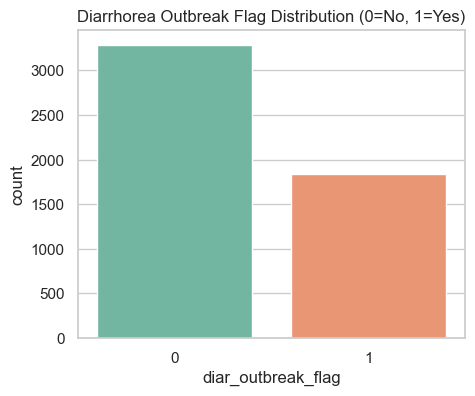

In [45]:
### EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set style
sns.set(style="whitegrid", palette="Set2")

# -----------------------
# Target Distribution
# -----------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df_dia, x="diar_outbreak_flag", palette="Set2")
plt.title("Diarrhorea Outbreak Flag Distribution (0=No, 1=Yes)")
plt.show()

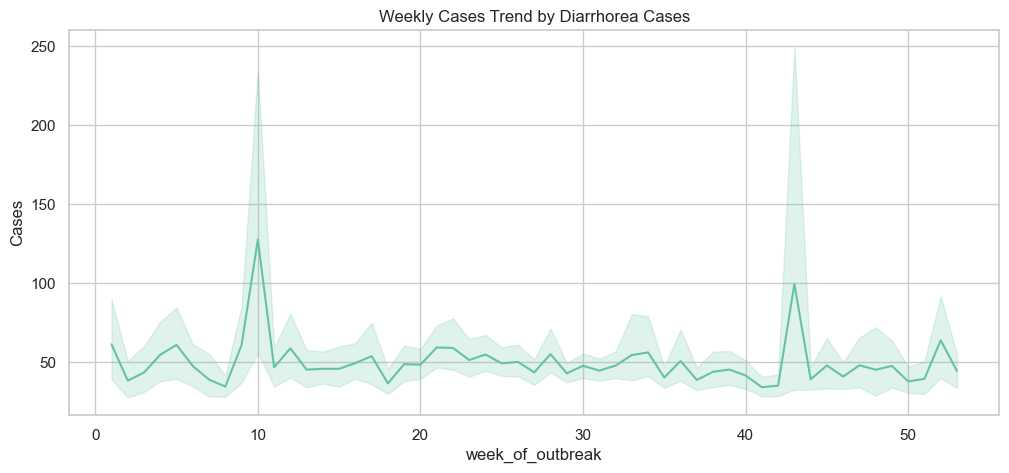

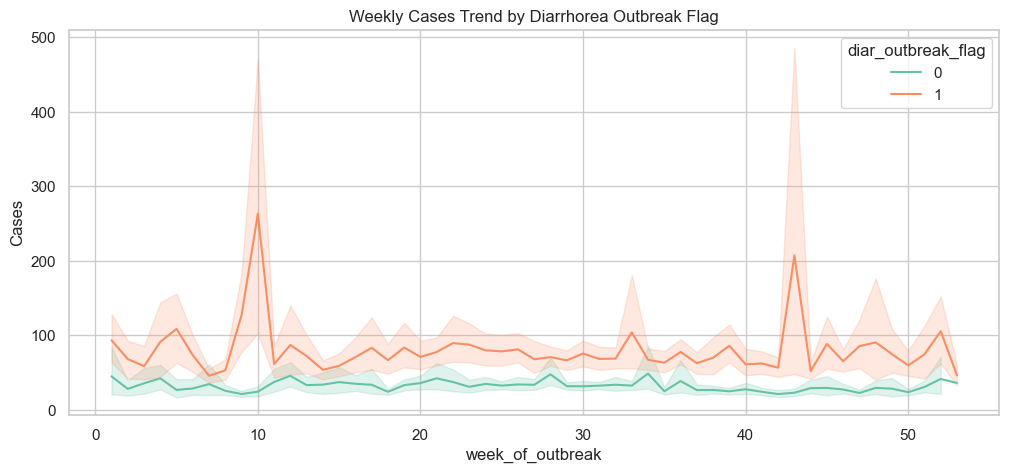

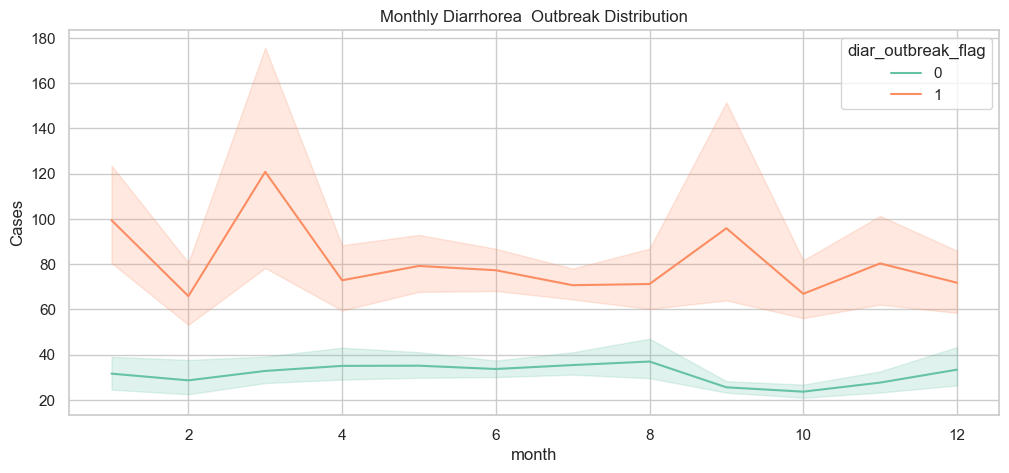

In [67]:
### # -----------------------
#  Temporal Trends
# -----------------------
plt.figure(figsize=(12,5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases")
plt.title("Weekly Cases Trend by Diarrhorea Cases")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", hue="diar_outbreak_flag")
plt.title("Weekly Cases Trend by Diarrhorea Outbreak Flag")
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_dia, x="month", y="Cases", hue="diar_outbreak_flag")
plt.title("Monthly Diarrhorea  Outbreak Distribution")
plt.show()

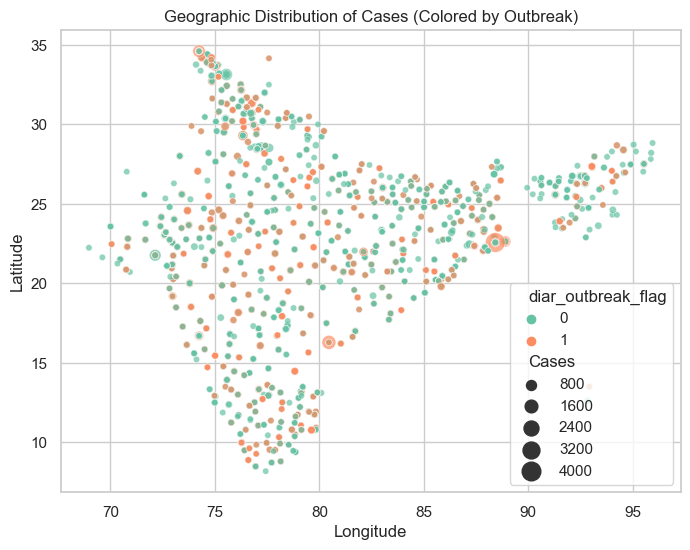

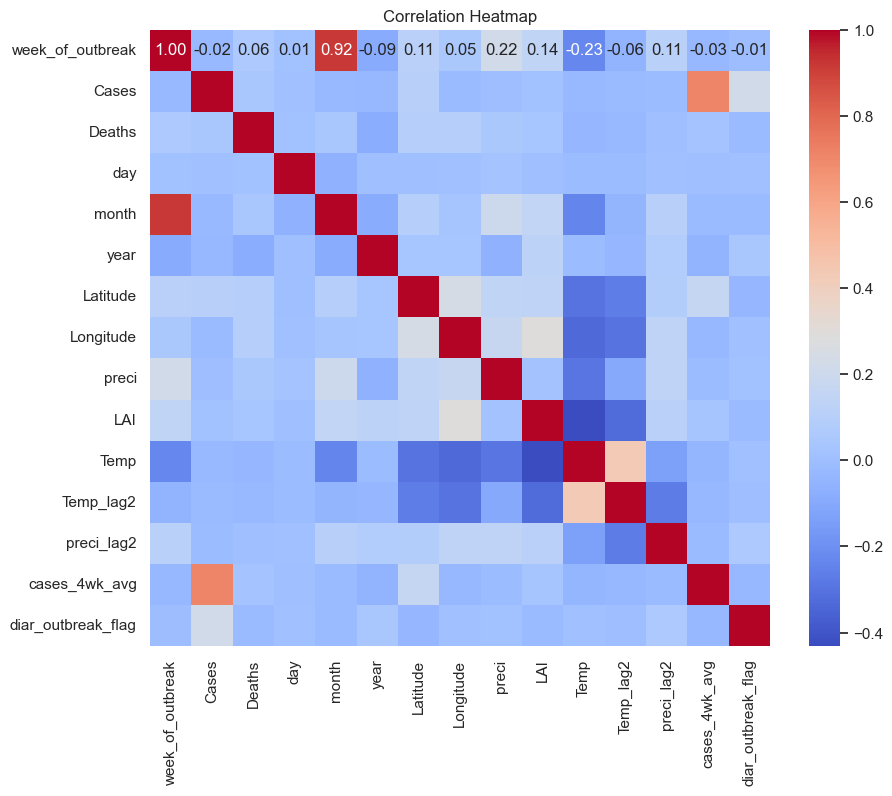

In [47]:
# -----------------------
# Geographic Scatter
# -----------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dia, x="Longitude", y="Latitude", hue="diar_outbreak_flag", size="Cases", sizes=(20,200), alpha=0.7)
plt.title("Geographic Distribution of Cases (Colored by Outbreak)")
plt.show()

# -----------------------
# Correlation Heatmap
# -----------------------
plt.figure(figsize=(10,8))
sns.heatmap(df_dia.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

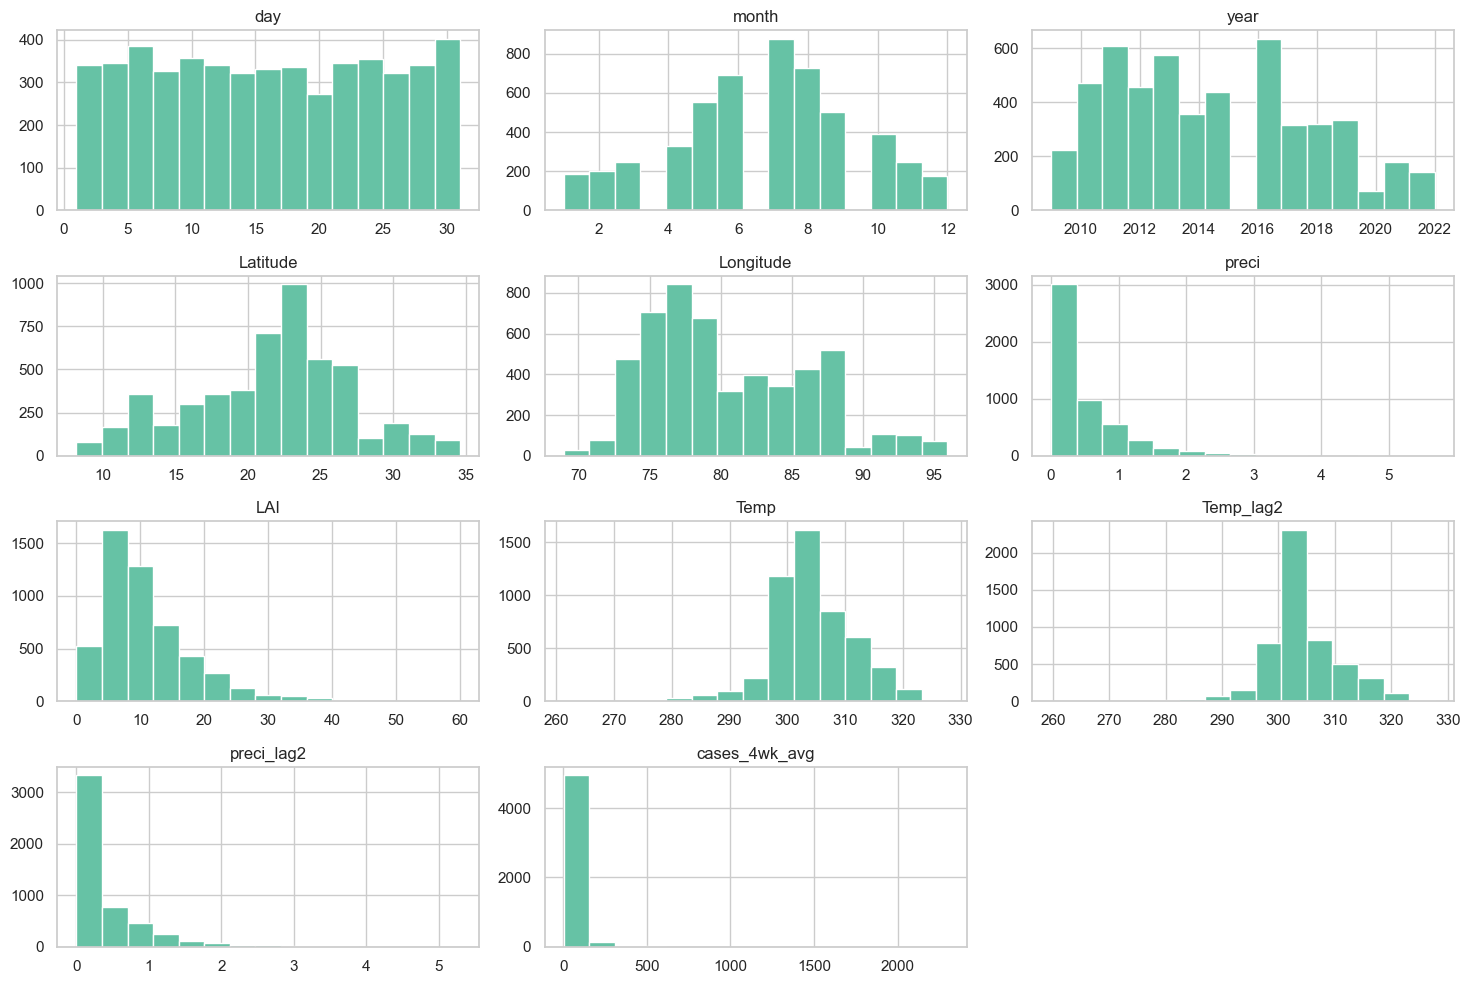

In [48]:
# Univariate Analysis
num_cols = df_dia.select_dtypes(include=['float64','int64']).columns
cat_cols = df_dia.select_dtypes(include=['object']).columns

# Histograms for numeric features
df_dia[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

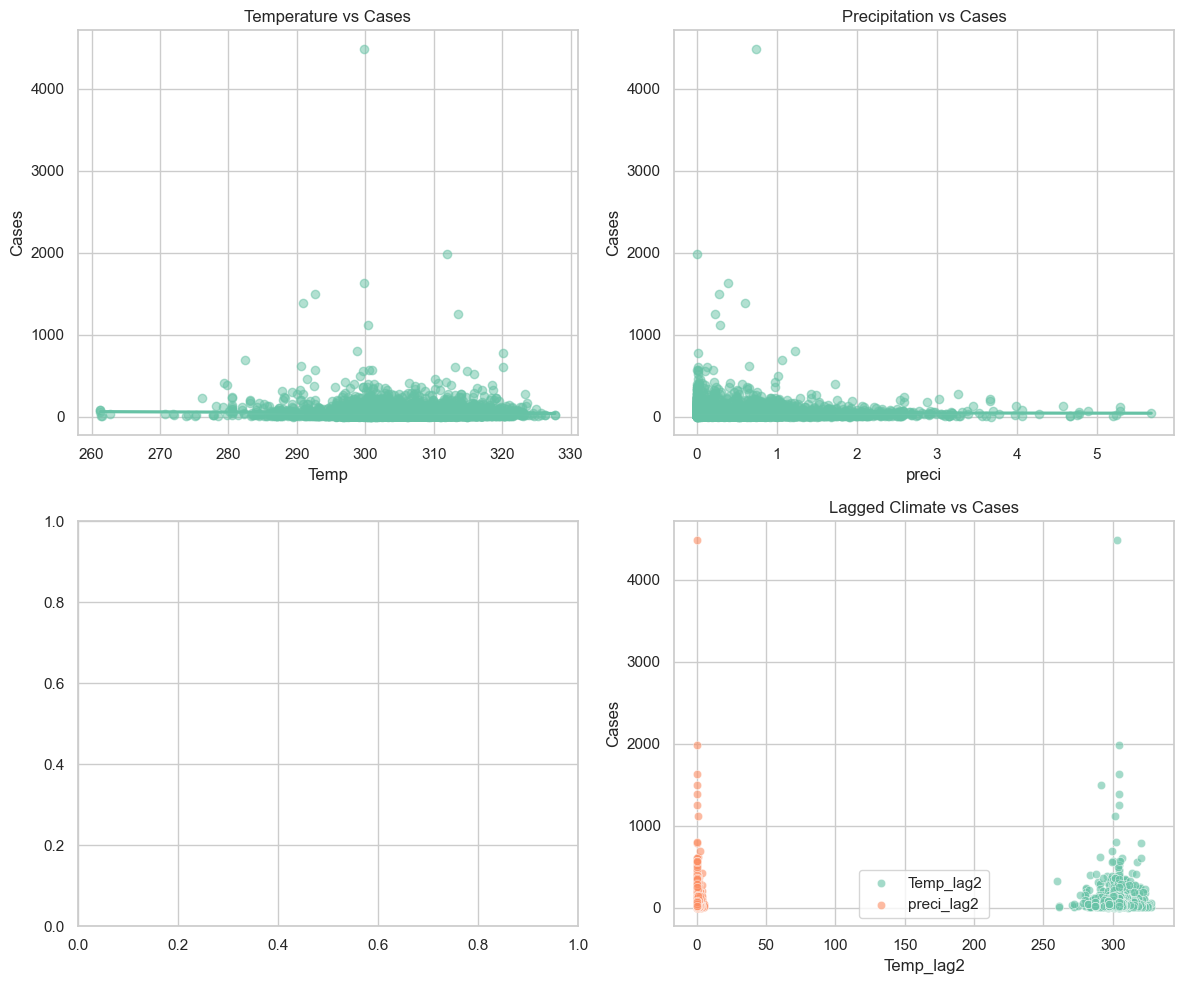

In [49]:
# Temperature vs Cases
fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.regplot(x="Temp", y="Cases", data=df_dia, ax=axs[0,0], scatter_kws={'alpha':0.5})
axs[0,0].set_title("Temperature vs Cases")

# Precipitation vs Cases
sns.regplot(x="preci", y="Cases", data=df_dia, ax=axs[0,1], scatter_kws={'alpha':0.5})
axs[0,1].set_title("Precipitation vs Cases")

# Lagged variables vs Cases
sns.scatterplot(x="Temp_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="Temp_lag2")
sns.scatterplot(x="preci_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="preci_lag2")
axs[1,1].legend()
axs[1,1].set_title("Lagged Climate vs Cases")

plt.tight_layout()
plt.show()

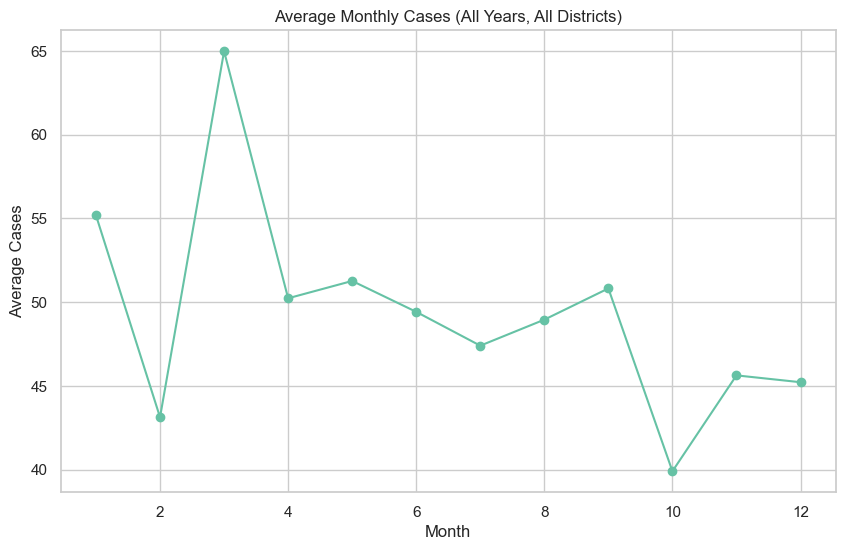

In [50]:
#  Average cases by month (across all districts and years)
df_monthly_avg = (
    df_dia.groupby("month")["Cases"]
    .mean()
    .reset_index()
)

#  Line plot
plt.figure(figsize=(10,6))
plt.plot(df_monthly_avg["month"], df_monthly_avg["Cases"], marker="o", linestyle="-")
plt.title("Average Monthly Cases (All Years, All Districts)")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.grid(True)
plt.show()

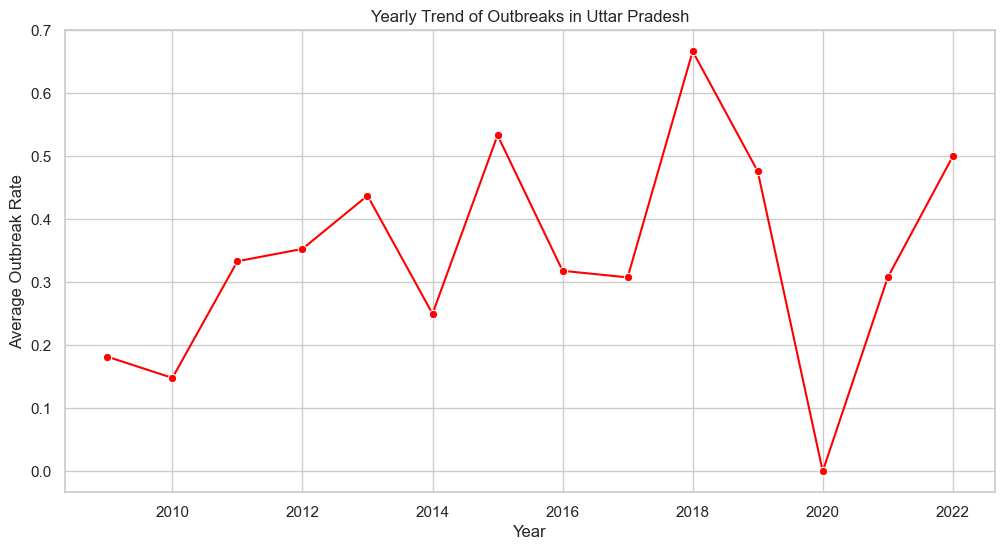

In [51]:
#### # Time trend of outbreaks in UP (yearly trend)

# Filter only Uttar Pradesh
df_up = df_dia[df_dia["state_ut"].str.lower() == "uttar pradesh"]


plt.figure(figsize=(12,6))
sns.lineplot(data=df_up.groupby(["year"])["diar_outbreak_flag"].mean().reset_index(),
             x="year", y="diar_outbreak_flag", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Outbreak Rate")
plt.title("Yearly Trend of Outbreaks in Uttar Pradesh")
plt.show()

###############################################################################
####       Correlation Analysis
##################################################################################



#### | Feature Type    | Correlation Method Used        | Description                                            |
#### | --------------- | ------------------------------ | ------------------------------------------------------ |
#### | **Numeric**     | **Point-Biserial** correlation | Special case of Pearson for binary vs numeric          |
#### | **Categorical** | **Cramér’s V**                 | Measures association between two categorical variables |


In [52]:
### Numeric Target (not the case here): Pearson and Spearman for numeric-numeric.

### Correlation Ratio (η) for categorical-numeric.

In [53]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, pointbiserialr, chi2_contingency

# --- Helper functions ---
def correlation_ratio(categories, values):
    """Correlation ratio (eta) for categorical-numeric association."""
    categories = np.array(categories)
    values = np.array(values)
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_values = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    ss_between = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    ss_total = np.sum((values - y_total_avg) ** 2)
    return np.sqrt(ss_between / ss_total)

def cramers_v(x, y):
    """Cramér's V for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# --- Main correlation function ---
def mixed_correlation_analysis(df, target_col, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    results = []
    target = df[target_col]
    target_type = "numeric" if pd.api.types.is_numeric_dtype(target) else "categorical"
    
    for col in df.columns:
        if col == target_col or col in exclude_cols:
            continue
        
        col_data = df[col]
        if col_data.isnull().all():
            continue
        
        # Drop NaNs only for the specific pair
        valid_idx = target.notna() & col_data.notna()
        if valid_idx.sum() == 0:
            continue
        col_data = col_data[valid_idx]
        target_clean = target[valid_idx]
        
        # Detect variable type
        if pd.api.types.is_numeric_dtype(col_data):
            col_type = "numeric"
        else:
            col_type = "categorical"
        
        corr_val = None
        p_val = None
        
        # Numeric target
        if target_type == "numeric":
            if col_type == "numeric":
                corr_val, p_val = pearsonr(target_clean, col_data)
                corr_spearman, p_spearman = spearmanr(target_clean, col_data)
                results.append((col, "Pearson", corr_val, p_val))
                results.append((col, "Spearman", corr_spearman, p_spearman))
            else:
                corr_val = correlation_ratio(col_data, target_clean)
                results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
        
        # Categorical target
        else:
            if col_type == "numeric":
                if target_clean.nunique() == 2:
                    target_binary = target_clean.astype("category").cat.codes
                    corr_val, p_val = pointbiserialr(target_binary, col_data)
                    results.append((col, "Point-Biserial", corr_val, p_val))
                else:
                    corr_val = correlation_ratio(target_clean, col_data)
                    results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
            else:
                corr_val = cramers_v(col_data, target_clean)
                results.append((col, "Cramér’s V", corr_val, np.nan))
    
    return pd.DataFrame(results, columns=["Feature", "Method", "Correlation", "p-value"])

# --- Example usage ---
# Columns to ignore in correlation (date, IDs, etc.)
exclude_columns = ["week_start_date", "Cases", "Disease","year","cases_4wk_avg"]

# Run correlation for diarrhoea outbreak flag
# df = pd.read_csv("epiclim_outbreak.csv")
df_corr2 = df_dia.copy()
result_table = mixed_correlation_analysis(df_corr2, target_col="diar_outbreak_flag", exclude_cols=exclude_columns)

# Sort by absolute correlation
result_table = result_table.sort_values(by="Correlation", key=np.abs, ascending=False)
print(result_table)


             Feature                   Method  Correlation       p-value
3           district  Correlation Ratio (eta)     0.322508           NaN
23        preci_lag2                 Spearman     0.131597  3.032928e-21
2           state_ut  Correlation Ratio (eta)     0.094859           NaN
22        preci_lag2                  Pearson     0.055640  6.716734e-05
11          Latitude                 Spearman    -0.038717  5.560202e-03
10          Latitude                  Pearson    -0.037749  6.866976e-03
5             Deaths                 Spearman    -0.032320  2.065356e-02
16               LAI                  Pearson    -0.022862  1.016690e-01
8              month                  Pearson    -0.019339  1.661994e-01
9              month                 Spearman    -0.019207  1.691201e-01
4             Deaths                  Pearson    -0.018983  1.741424e-01
19              Temp                 Spearman     0.017080  2.214233e-01
21         Temp_lag2                 Spearman    -0

In [54]:
###  Correlation: Strength & direction of relationship (ranges -1 to +1).

### p-value: Significance of the result. Typically, p < 0.05 is considered statistically significant.

## Method: Correlation method based on variable type (Pearson, Spearman, Correlation Ratio)

##Stronger indicators: District and state: Suggest geographic hotspots.

## Precipitation lag (2 weeks): Indicates outbreaks may be delayed responses to rainfall.

## Weak/no indicators: Temperature, vegetation, current rainfall, day/month/week: No strong or consistent signals.

## Deaths: Weak signal, possibly affected by low reporting granularity.

C:\Users\shash\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


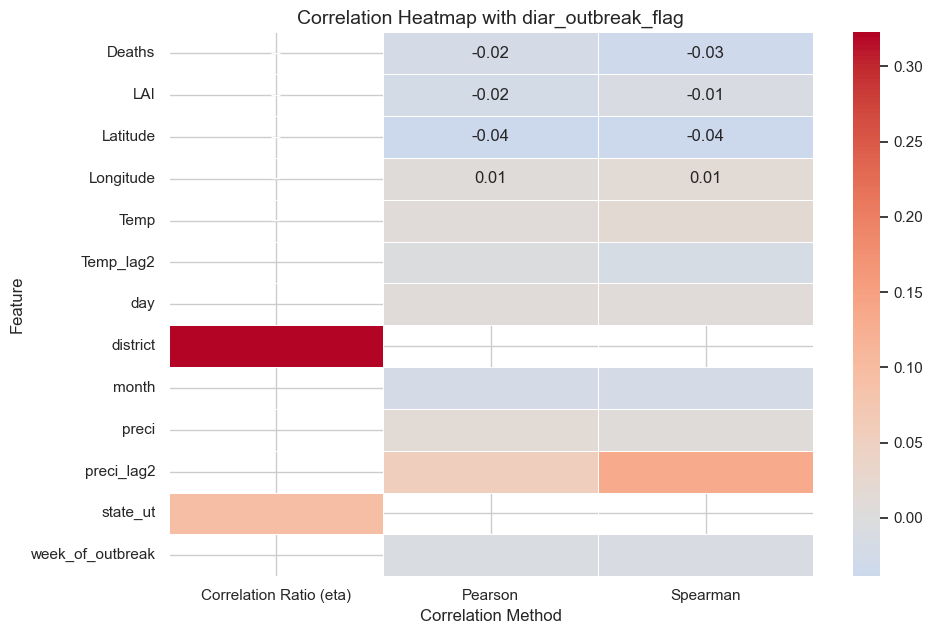

In [55]:
# Pivot table: Features x Method
heatmap_data = result_table.pivot(
    index="Feature", 
    columns="Method", 
    values="Correlation"
)

# Create heatmap
plt.figure(figsize=(10, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Correlation Heatmap with diar_outbreak_flag", fontsize=14)
plt.xlabel("Correlation Method")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

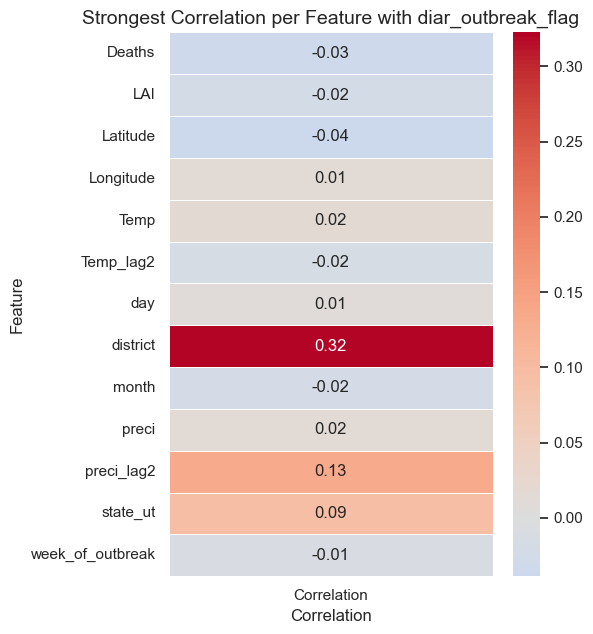

In [56]:
# Find the strongest correlation per feature
strongest_corr = (
    result_table.loc[result_table.groupby("Feature")["Correlation"].apply(lambda x: x.abs().idxmax())]
    .reset_index(drop=True)
)

# Prepare data for heatmap
heatmap_data = strongest_corr.set_index("Feature")[["Correlation"]]

# Create heatmap
plt.figure(figsize=(6, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Strongest Correlation per Feature with diar_outbreak_flag", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [57]:
#### ML Modelling 
####

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()


# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 19)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.86      0.75      0.80        24

    accuracy                           0.86        66
   macro avg       0.86      0.84      0.85        66
weighted avg       0.86      0.86      0.86        66

ROC-AUC: 0.9146825396825398


In [59]:
### Accuracy: 86%

### Macro Avg F1: 0.85 (average per class)

### ROC-AUC: 0.9147

### Class-wise performance: The model does better for Class 0 (No Outbreak) than Class 1:

### Higher recall (0.93): It identifies most "No Outbreak" cases.

### Class 1 (Outbreak) has lower recall (0.75), meaning some outbreaks are missed (false negatives), but still acceptable.

### Precision: Both classes have high precision (~0.86–0.87), indicating the model isn’t producing many false positives.

### ROC-AUC = 0.91: This is excellent, indicating the model discriminates well between outbreak and non-outbreak cases.

### AUC > 0.9 is typically considered very strong for health-related classification tasks.


Top 10 Important Features:
             Feature  Importance
1              Cases    0.349446
13     cases_4wk_avg    0.105269
12        preci_lag2    0.054629
7          Longitude    0.053284
11         Temp_lag2    0.049534
6           Latitude    0.046959
8              preci    0.045257
10              Temp    0.043420
9                LAI    0.042397
14  district_encoded    0.041852


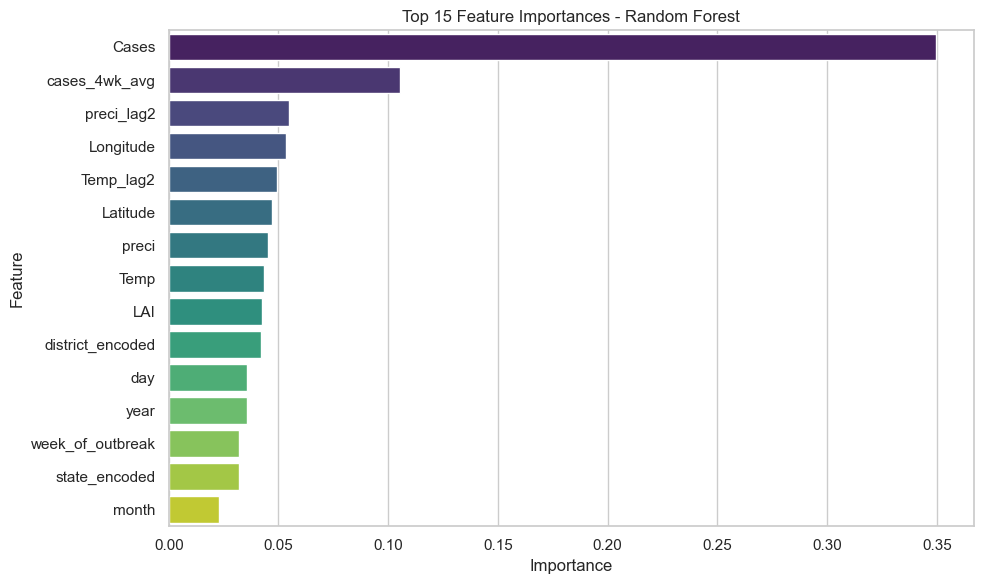

In [60]:
# -----------------------------
# 9. Feature Importance
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()


# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 19)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        42
           1       0.54      0.29      0.38        24

    accuracy                           0.65        66
   macro avg       0.61      0.57      0.57        66
weighted avg       0.63      0.65      0.62        66

ROC-AUC: 0.6498015873015873



Top 10 Important Features:
             Feature  Importance
6          Longitude    0.098536
10         Temp_lag2    0.093787
7              preci    0.093139
9               Temp    0.087351
5           Latitude    0.087096
12  district_encoded    0.084979
11        preci_lag2    0.081660
8                LAI    0.077598
2                day    0.065268
0   week_of_outbreak    0.063127


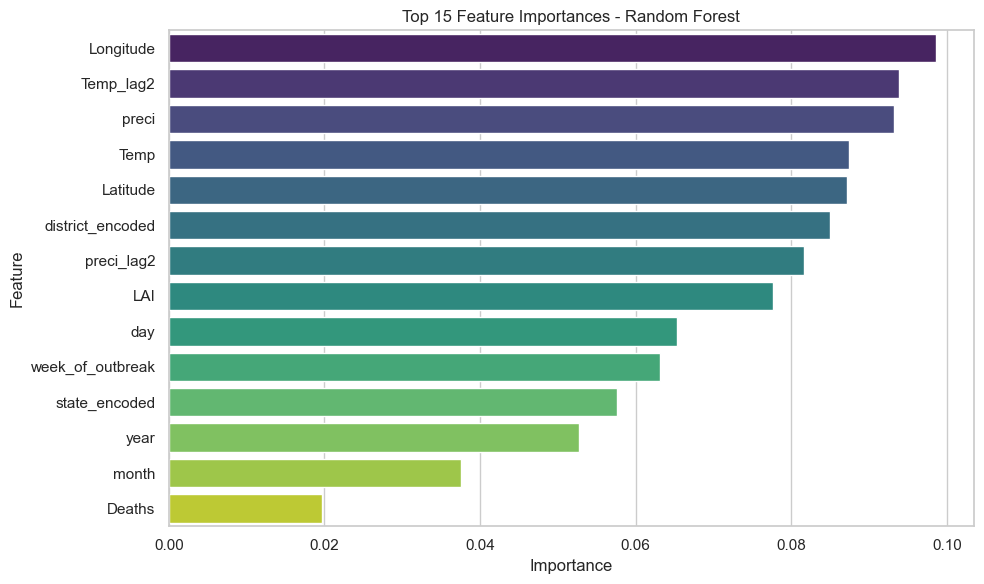

In [62]:
# -----------------------------
# 9. Feature Importance
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [63]:
#### 
### 
## Previously (with leakage features - cases and 4 week avg ), : Accuracy ~86%, F1-score for class 1 ~0.80, ROC-AUC ~0.91
### Now (without leakage): Accuracy dropped to 65%, F1 for class 1 is just 0.38 ROC-AUC dropped to 0.65

## Class 0 (No Outbreak) High recall (0.86) → Model correctly identifies most "no outbreak" weeks.
### Precision (0.68) → When it predicts "no outbreak", it's usually right.
### Overall good performance for the majority class.

###Class 1 (Outbreak) Low recall (0.29) → The model misses 71% of actual outbreaks (false negatives).
## F1-score is just 0.38 → Weak overall performance on outbreak detection.
## The model struggles with the minority class, which is critical in public health applications.

In [72]:
### Lets try with XGBoost Model


from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (example already pre-filtered)
# -----------------------------
df_xgsample = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_xgsample)  # population size
p = df_xgsample["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_xgsample.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features 
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train XGBoost model
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # imbalance ratio

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 20)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64


C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\shash\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70        42
           1       0.38      0.25      0.30        24

    accuracy                           0.58        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.54      0.58      0.55        66

ROC-AUC: 0.5793650793650793


C:\Users\shash\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


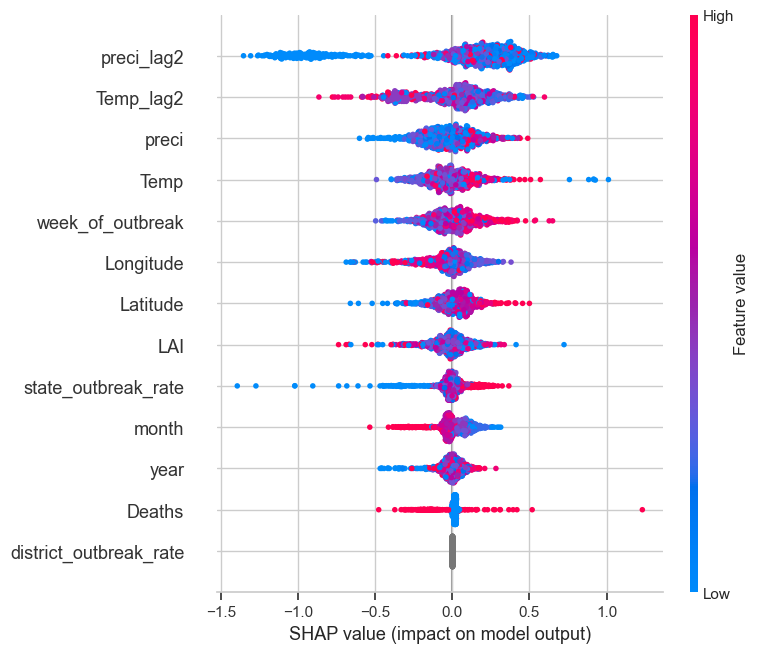

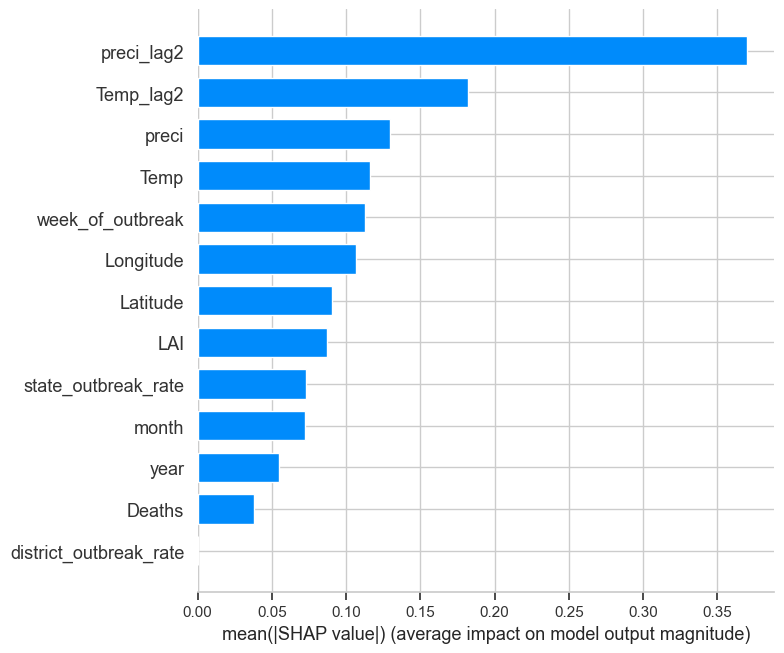

In [77]:
# -----------------------------
# 8. SHAP Feature Importance and Plot
# -----------------------------

# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values (Summary plot) with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Alternatively, you can also plot the bar chart for feature importance with actual feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#### Poor performance:

## Recall (0.21) → Model is missing 79% of actual outbreaks##

## F1-score (0.26) is very low, meaning it fails to balance precision and recall

## Not suitable for real-world health surveillance in this current form

In [96]:
#### Add randomized Search CV to see if performance improves ..........

from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint

# -----------------------------
# 1. Load and sample data
# -----------------------------
df_sampled = df_dia.copy()

N = len(df_sampled)
p = df_sampled["diar_outbreak_flag"].mean()
Z = 1.96  # 95% confidence level
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. RandomizedSearchCV for Random Forest
# -----------------------------
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
    "class_weight": ['balanced', 'balanced_subsample']
}

base_model = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# -----------------------------
# 5. Best Model Evaluation
# -----------------------------
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nBest Parameters Found:\n", search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 20)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters Found:
 {'class_weight': 'balanced_subsample', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 143}

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        42
           1       0.64      0.29      0.40        24

    accuracy                           0.68        66
   macro avg       0.66      0.60      0.59        66
weighted avg       0.67      0.68      0.64        66

ROC-AUC: 0.6031746031746031


In [95]:
#9) 
### Try increaseing the sample size to 1500 to address class imbalance issue

# -----------------------------
# 1. Use larger stratified sample (e.g., 1500 samples) from full dataset
# -----------------------------
sample_size = 1500  # increase sample size
df_sampled, _ = train_test_split(
    df_dia,
    train_size=sample_size,
    stratify=df_dia["diar_outbreak_flag"],
    random_state=42
)

print(f"Sampled dataset shape: {df_sampled.shape}")
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Sampled dataset shape: (1500, 20)
0    0.642
1    0.358
Name: diar_outbreak_flag, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       193
           1       0.43      0.50      0.46       107

    accuracy                           0.58       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.60      0.58      0.59       300

ROC-AUC: 0.5929979177763788


In [94]:
#8) 
## Now try over samping using SMOTE 

from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Apply SMOTE to training data only
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight=None,  # no class_weight needed as data balanced with SMOTE
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train_res, y_train_res)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 20)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64
After SMOTE, training dataset shape: (340, 14)
Training target distribution after SMOTE:
0    0.5
1    0.5
Name: diar_outbreak_flag, dtype: float64

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        42
           1       0.47      0.33      0.39        24

    accuracy                           0.62        66
   macro avg       0.57      0.56      0.56        66
weighted avg       0.60      0.62      0.60        66

ROC-AUC: 0.6388888888888888


In [93]:
##7)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Apply SMOTE on training data
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 7. Train XGBoost model
# -----------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train_res, y_train_res)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report after SMOTE with XGBoost:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 20)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64
After SMOTE, training dataset shape: (340, 14)
Training target distribution after SMOTE:
0    0.5
1    0.5
Name: diar_outbreak_flag, dtype: float64


C:\Users\shash\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [18:37:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report after SMOTE with XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        42
           1       0.53      0.38      0.44        24

    accuracy                           0.65        66
   macro avg       0.61      0.59      0.59        66
weighted avg       0.63      0.65      0.64        66

ROC-AUC: 0.6150793650793651


In [92]:
##6
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# -----------------------------
# 1. Copy dataframe
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling to get balanced representation
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n / N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Encode categorical variables
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# -----------------------------
# 5. Prepare features and target
# -----------------------------
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# -----------------------------
# 6. Handle missing values and scale
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 7. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 8. Calculate scale_pos_weight for XGBoost to handle imbalance
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# -----------------------------
# 9. Define base models for ensemble
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    max_depth=8,
    min_samples_split=5
)

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 10. Create Voting Classifier (soft voting)
# -----------------------------
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'
)

# -----------------------------
# 11. Train ensemble
# -----------------------------
ensemble.fit(X_train, y_train)

# -----------------------------
# 12. Predict and evaluate
# -----------------------------
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 20)
0    0.642424
1    0.357576
Name: diar_outbreak_flag, dtype: float64


C:\Users\shash\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [18:36:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        42
           1       0.50      0.29      0.37        24

    accuracy                           0.64        66
   macro avg       0.59      0.56      0.56        66
weighted avg       0.61      0.64      0.61        66

ROC-AUC: 0.6339285714285714


In [91]:
##### Lets use complete dataframe

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

# -----------------------------
# 1. Use the complete df_dia dataset
# -----------------------------
df_sampled = df_dia.copy()

print(f"Complete dataset shape: {df_sampled.shape}")
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocess features
# -----------------------------
# Encode categorical variables (e.g., district and state)
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])  # Features
y = df_sampled["diar_outbreak_flag"]  # Target

# Handle missing values by replacing them with the median of the column
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train model (RandomForestClassifier with class weight)
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",  # Handle class imbalance
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate the model
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

# Calculate and display the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


Complete dataset shape: (5127, 20)
0    0.641701
1    0.358299
Name: diar_outbreak_flag, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       658
           1       0.40      0.68      0.51       368

    accuracy                           0.52      1026
   macro avg       0.56      0.56      0.52      1026
weighted avg       0.60      0.52      0.53      1026

ROC-AUC: 0.6063437458702259


In [86]:
#### replace state and district category variables with relative values w.r.t outbreak rate

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_dia.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_dia['district_outbreak_rate'] = df_dia['district'].map(district_outbreak_rate)


drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
rfmodel = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
rfmodel.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = rfmodel.predict(X_test)
y_prob = rfmodel.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Sampled dataset shape: (5127, 20)
0    0.641701
1    0.358299
Name: diar_outbreak_flag, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.45      0.56       658
           1       0.42      0.70      0.52       368

    accuracy                           0.54      1026
   macro avg       0.57      0.57      0.54      1026
weighted avg       0.62      0.54      0.54      1026

ROC-AUC: 0.6076941819743624



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67       658
           1       0.49      0.71      0.58       368

    accuracy                           0.63      1026
   macro avg       0.64      0.65      0.62      1026
weighted avg       0.68      0.63      0.63      1026

ROC-AUC: 0.7005769294304215

Top 10 Important Features:
                  Feature  Importance
8  district_outbreak_rate    0.378492
7              preci_lag2    0.161935
6               Temp_lag2    0.091109
3                   preci    0.084687
5                    Temp    0.076640
4                     LAI    0.058505
0        week_of_outbreak    0.058475
9     state_outbreak_rate    0.042859
2                   month    0.031264
1                  Deaths    0.016033


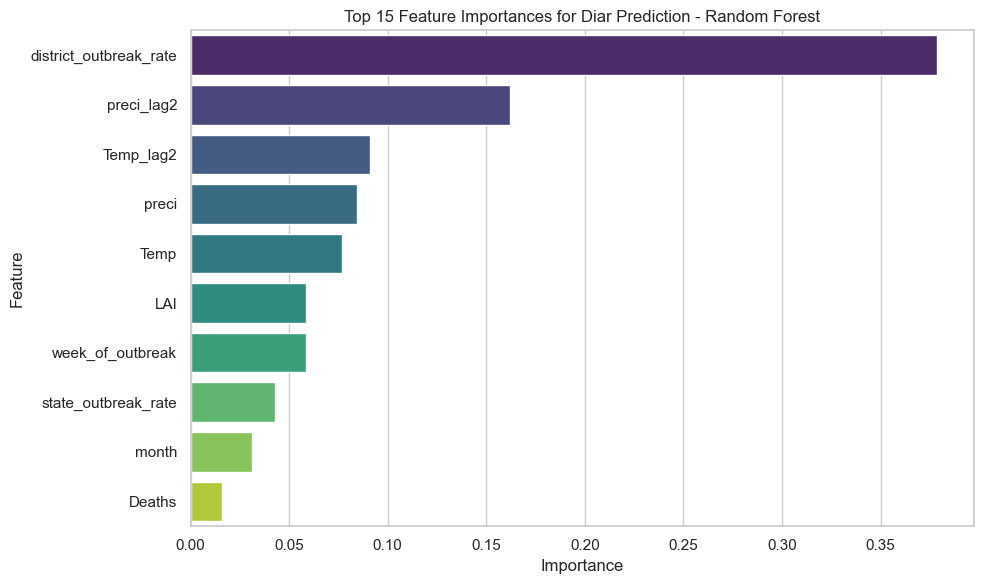

In [90]:
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train Random Forest model
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate the model
# -----------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 6. Feature Importance Plot
# -----------------------------
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names from the pre-processed dataset (before dropping columns)
feature_names = X.columns

# Create DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest')
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters found:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': None, 'bootstrap': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       658
           1       0.59      0.26      0.36       368

    accuracy                           0.67      1026
   macro avg       0.64      0.58      0.57      1026
weighted avg       0.65      0.67      0.63      1026

ROC-AUC: 0.7005149828201401

Top 10 Important Features:
                  Feature  Importance
8  district_outbreak_rate    0.351996
7              preci_lag2    0.161607
6               Temp_lag2    0.098050
3                   preci    0.097521
5                    Temp    0.086459
0        week_of_outbreak    0.060094
4                     LAI    0.058818
9     state_outbreak_rate    0.036305
2                   month    0.

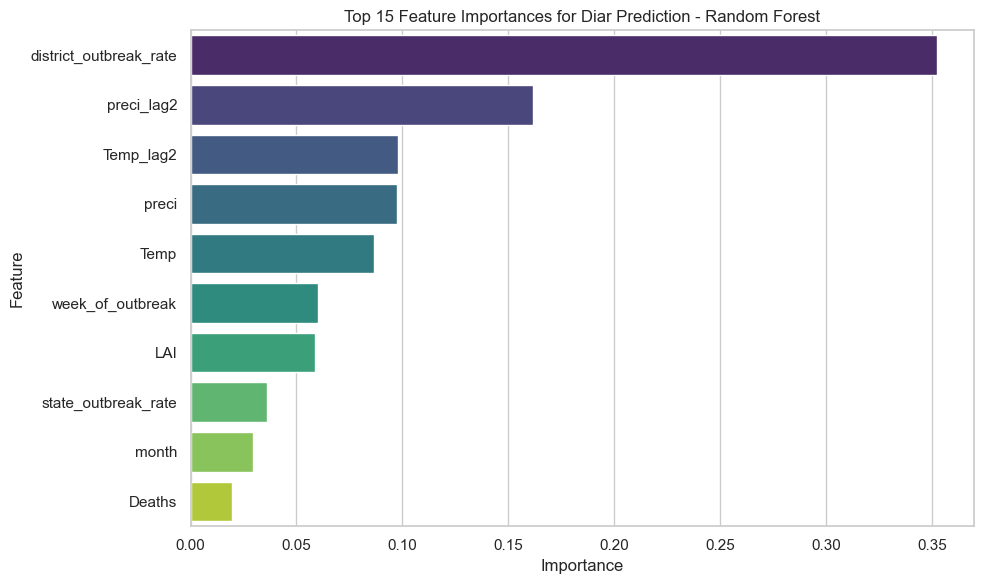

In [97]:
### RAndomized search CV
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Set up RandomizedSearchCV for Random Forest model
# -----------------------------
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter space to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced_subsample', 'balanced', None]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best hyperparameters found: ", random_search.best_params_)

# -----------------------------
# 5. Evaluate the best model from RandomizedSearchCV
# -----------------------------
best_rf_model = random_search.best_estimator_

# Predict using the best model
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 6. Feature Importance Plot for the Best Model
# -----------------------------
# Get feature importances
importances = best_rf_model.feature_importances_

# Get feature names from the pre-processed dataset (before dropping columns)
feature_names = X.columns

# Create DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest')
plt.tight_layout()
plt.show()



Sampled dataset shape: (5127, 20)
0    0.641701
1    0.358299
Name: diar_outbreak_flag, dtype: float64


C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\shash\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\shash\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [11:45:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.61      0.65       658
           1       0.42      0.51      0.46       368

    accuracy                           0.57      1026
   macro avg       0.56      0.56      0.55      1026
weighted avg       0.59      0.57      0.58      1026

ROC-AUC: 0.6003390544469407


C:\Users\shash\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


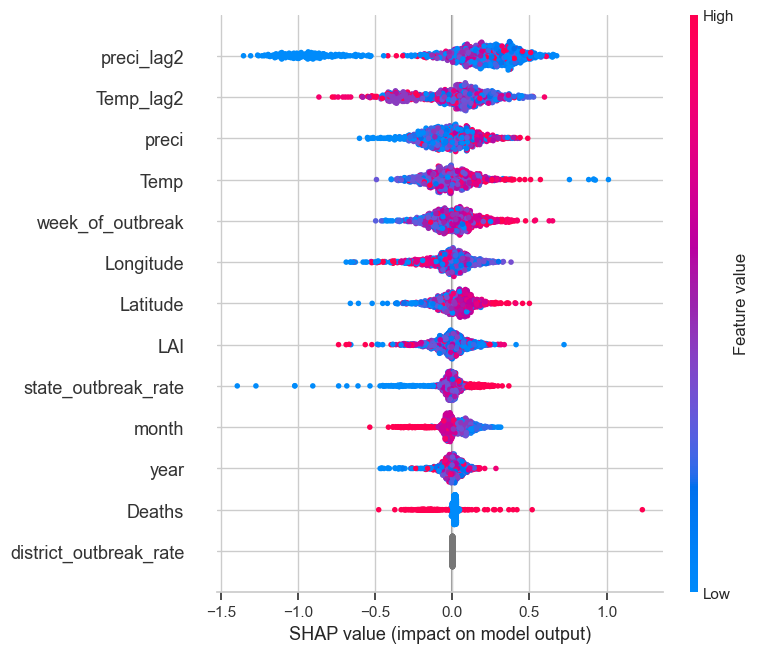

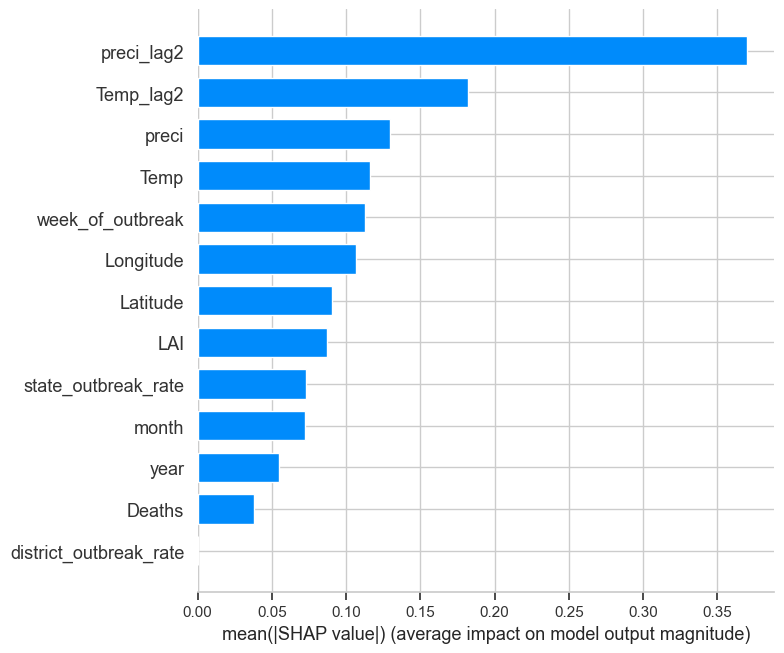


Top 10 Important Features based on SHAP values:
                Feature  SHAP Importance
10           preci_lag2         0.369724
9             Temp_lag2         0.181853
6                 preci         0.129650
8                  Temp         0.116277
0      week_of_outbreak         0.112572
5             Longitude         0.106545
4              Latitude         0.090635
7                   LAI         0.087191
12  state_outbreak_rate         0.073033
2                 month         0.072161


In [78]:
### Lets try with XGBoost Model


from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (example already pre-filtered)
# -----------------------------
df_xgsample = df_dia.copy()




print("Sampled dataset shape:", df_xgsample.shape)
print(df_xgsample["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_xgsample.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_xgsample['state_outbreak_rate'] = df_xgsample['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_xgsample.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_xgsample['district_outbreak_rate'] = df_xgsample['district'].map(district_outbreak_rate)


drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_xgsample.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_xgsample["diar_outbreak_flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train XGBoost model
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # imbalance ratio

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values (Summary plot) with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Alternatively, you can also plot the bar chart for feature importance with actual feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# You can also use SHAP dependence plots to analyze relationships between specific features and the prediction
# shap.dependence_plot('feature_name', shap_values, X_test)

# -----------------------------
# Extract Feature Importance Values
# -----------------------------

# Extracting the average absolute SHAP values for each feature
feature_importance_values = np.abs(shap_values.values).mean(axis=0)

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': feature_importance_values
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='SHAP Importance', ascending=False)

# Display top 10 important features
print("\nTop 10 Important Features based on SHAP values:")
print(feature_importance_df.head(10))


Weather Factors: Precipitation and temperature, both current and lagged (past data), have the highest influence on outbreaks, suggesting a strong relationship between weather patterns and disease outbreaks.

Geographical Influence: Location-based features (latitude, longitude, state outbreak rate) also have substantial importance, pointing to regional patterns and geographical factors as crucial to outbreak prediction.

Temporal Factors: Features like week_of_outbreak and month indicate that outbreaks follow time-dependent patterns, likely tied to seasonal trends or periodic environmental changes.

Vegetation (LAI): LAI’s moderate importance suggests that vegetation, possibly influencing vector populations, also plays a role in predicting outbreaks.


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       658
           1       0.53      0.40      0.45       368

    accuracy                           0.66      1026
   macro avg       0.62      0.60      0.60      1026
weighted avg       0.64      0.66      0.64      1026

ROC-AUC: 0.6918052894145632


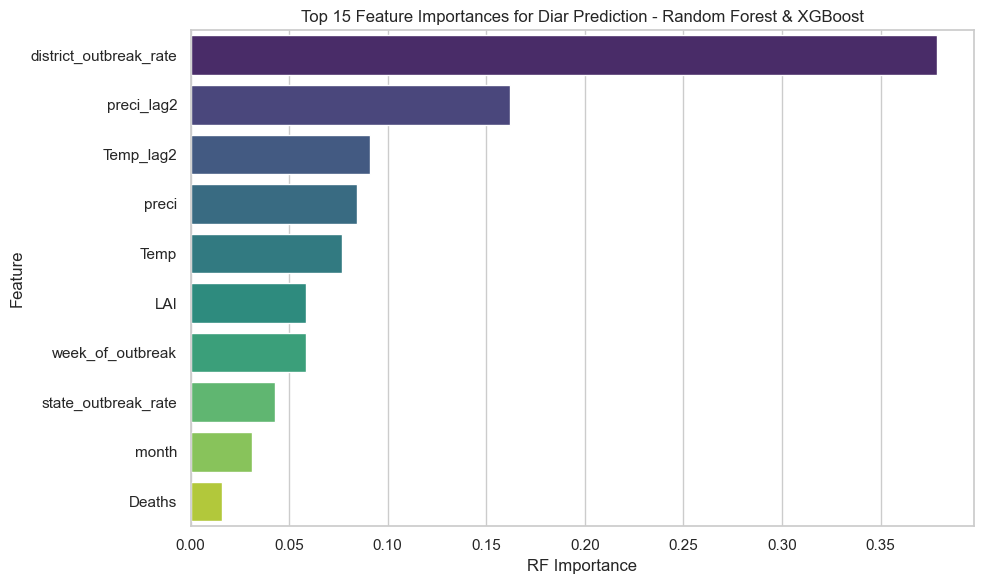

In [99]:
### Ensemble with disease break out rate at state and district level 

# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Set up individual models for ensemble
# -----------------------------
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define individual models
rf_model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42,
    class_weight="balanced_subsample", 
    max_depth=8, 
    min_samples_split=5
)

xgb_model = XGBClassifier(
    n_estimators=300, 
    random_state=42, 
    scale_pos_weight=1  # Adjust according to the imbalance
)

log_model = LogisticRegression(
    random_state=42,
    max_iter=500
)

# -----------------------------
# 5. Create ensemble model (VotingClassifier with soft voting)
# -----------------------------
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', log_model)],
    voting='soft'  # Use soft voting (probability-based)
)

# -----------------------------
# 6. Train individual models first
# -----------------------------
rf_model.fit(X_train, y_train)   # Fit Random Forest model separately
xgb_model.fit(X_train, y_train)  # Fit XGBoost model separately
log_model.fit(X_train, y_train)  # Fit Logistic Regression model separately

# Then train the ensemble model
ensemble_model.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate the ensemble model
# -----------------------------
y_pred = ensemble_model.predict(X_test)
y_prob = ensemble_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 8. Feature Importance Plot (for Random Forest and XGBoost)
# -----------------------------
# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_

# Get feature importances from XGBoost
xgb_importances = xgb_model.feature_importances_

# Combine and plot importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_importances,
    'XGBoost Importance': xgb_importances
}).sort_values(by='RF Importance', ascending=False)

# Plotting the top 15 features based on Random Forest importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(15), x='RF Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest & XGBoost')
plt.tight_layout()
plt.show()


In [100]:
df_dia.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5127 entries, 2019-06-06 to 2015-08-09
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   week_of_outbreak        5127 non-null   int32         
 1   state_ut                5127 non-null   object        
 2   district                5127 non-null   object        
 3   Disease                 5127 non-null   object        
 4   Cases                   5127 non-null   int32         
 5   Deaths                  5127 non-null   int32         
 6   day                     5127 non-null   int64         
 7   month                   5127 non-null   int64         
 8   year                    5127 non-null   int64         
 9   Latitude                5127 non-null   float64       
 10  Longitude               5127 non-null   float64       
 11  preci                   5127 non-null   float64       
 12  LAI                     5127 n

In [112]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
df = df_sampled.copy()  # Use the actual DataFrame here

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['state_ut', 'district', 'Disease']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 1. Convert numerical columns to discrete (bins)
# We can discretize continuous variables (e.g., 'Latitude', 'Longitude', etc.) into bins, if necessary
# Here, we convert a few numerical features into categorical (bins) for testing purposes
df['Temp_binned'] = pd.cut(df['Temp'], bins=5, labels=[0, 1, 2, 3, 4])
df['preci_binned'] = pd.cut(df['preci'], bins=5, labels=[0, 1, 2, 3, 4])

# 2. Prepare features and target for Chi-Square Test
X = df.drop(columns=['diar_outbreak_flag', 'week_start_date', 'Cases','cases_4wk_avg', 'year'])
y = df['diar_outbreak_flag']

# 3. Apply Chi-Square test
chi2_results = []
for column in X.columns:
    # Create contingency table
    contingency_table = pd.crosstab(X[column], y)
    
    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append((column, chi2_stat, p_val))

# Convert results to a DataFrame for easier viewing
chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Stat', 'P-Value'])


# Display features with p-values below a threshold (e.g., 0.05)


print("\nChi-Square Test Results with P-Value < 0.05:")
print(chi2_results_df[chi2_results_df['P-Value'] < 0.05].sort_values(by='P-Value'))


chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to show the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stats,
    'P-Value': p_values
})

# Sort by Chi-Square statistic
chi2_results = chi2_results.sort_values(by='Chi2 Stat', ascending=False)

# Print all results
print("\n\nChi-Square Test Results for all features:")
print(chi2_results)




Chi-Square Test Results with P-Value < 0.05:
                   Feature    Chi2 Stat       P-Value
14  district_outbreak_rate   535.393069  1.011328e-67
13              preci_lag2  4175.473751  2.616868e-05
12               Temp_lag2  3503.078061  9.475554e-05
4                   Deaths    28.849763  2.395005e-03
0         week_of_outbreak    79.127964  9.026343e-03
15     state_outbreak_rate    46.134160  1.687908e-02


Chi-Square Test Results for all features:
                   Feature  Chi2 Stat       P-Value
14  district_outbreak_rate  35.876887  2.101874e-09
13              preci_lag2  14.767830  1.215923e-04
10                     LAI  12.855265  3.365311e-04
7                 Latitude  10.236990  1.376520e-03
4                   Deaths   5.947251  1.474026e-02
2                 district   3.268988  7.060117e-02
17            preci_binned   2.245068  1.340410e-01
1                 state_ut   2.193397  1.386033e-01
5                      day   1.997878  1.575196e-01
6           

| Feature                  | Chi2 Stat | P-Value                |
| ------------------------ | --------- | ---------------------- |
| `district_outbreak_rate` | 535.39    | 1.01 X 10^{-67}        |
| `preci_lag2`             | 4175.47   | 2.62 X 10^{-5}         |
| `Temp_lag2`              | 3503.08   | 9.48 X 10^{-5}         |
| `Deaths`                 | 28.85     | 0.0024                 |
| `state_outbreak_rate`    | 46.13     | 0.0169                 |


For outbreak prediction, district-level outbreak rate, recent precipitation, and temperature appear to be the most important features. These environmental factors, along with historical death rates, should be considered as primary predictors in your models.


Epoch 1/10
65/65 [==============================] - 11s 43ms/step - loss: 0.6499 - accuracy: 0.6245 - val_loss: 0.6266 - val_accuracy: 0.6732
Epoch 2/10
65/65 [==============================] - 1s 16ms/step - loss: 0.6265 - accuracy: 0.6489 - val_loss: 0.6218 - val_accuracy: 0.6673
Epoch 3/10
65/65 [==============================] - 1s 17ms/step - loss: 0.6209 - accuracy: 0.6465 - val_loss: 0.6155 - val_accuracy: 0.6634
Epoch 4/10
65/65 [==============================] - 1s 17ms/step - loss: 0.6136 - accuracy: 0.6509 - val_loss: 0.6069 - val_accuracy: 0.6683
Epoch 5/10
65/65 [==============================] - 1s 17ms/step - loss: 0.6026 - accuracy: 0.6580 - val_loss: 0.5982 - val_accuracy: 0.6693
Epoch 6/10
65/65 [==============================] - 1s 17ms/step - loss: 0.5939 - accuracy: 0.6602 - val_loss: 0.5991 - val_accuracy: 0.6732
Epoch 7/10
65/65 [==============================] - 1s 18ms/step - loss: 0.5884 - accuracy: 0.6699 - val_loss: 0.6004 - val_accuracy: 0.6761
Epoch 8/10
6

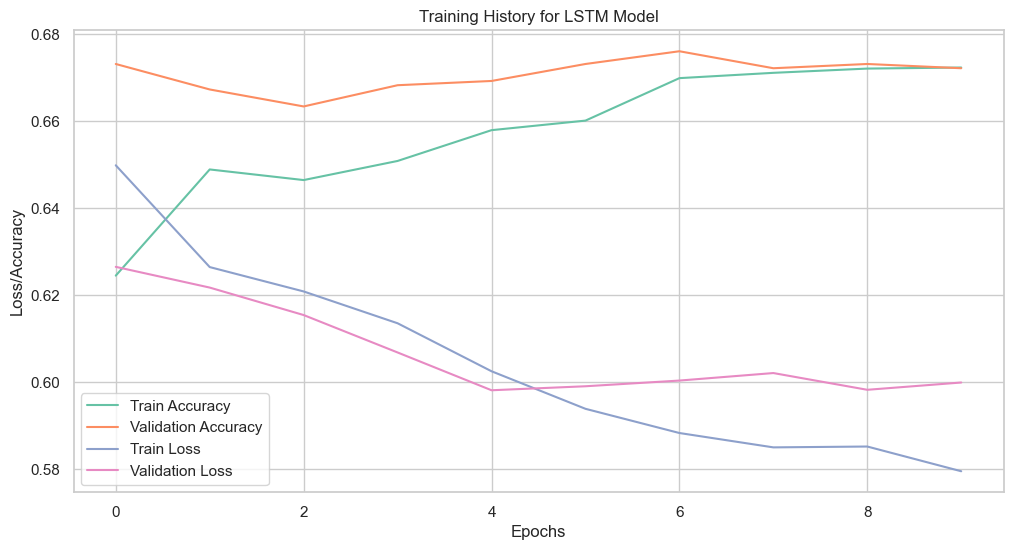

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Reshape Data for LSTM (3D array: [samples, time_steps, features])
# -----------------------------

# Here, we'll use a time window of 3 days for LSTM input
time_steps = 3
X_seq = []
y_seq = []

# Create sequences from the data
for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])  # past 3 time steps as features
    y_seq.append(y.iloc[i])  # current step as target

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# -----------------------------
# 4. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# -----------------------------
# 5. Build LSTM Model
# -----------------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 6. Train the Model
# -----------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# -----------------------------
# 7. Evaluate the Model
# -----------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_prob = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 8. Plot Training History
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# -----------------------------
# 9. Feature Importance (for LSTM, this isn't as straightforward, but you can use SHAP or LIME)
# -----------------------------
# SHAP or LIME would need to be integrated here to interpret the LSTM model, 
# since LSTM is a black-box model in terms of direct feature importances.


Epoch 1/10
65/65 [==============================] - 11s 50ms/step - loss: 0.6525 - accuracy: 0.6336 - val_loss: 0.6252 - val_accuracy: 0.6654
Epoch 2/10
65/65 [==============================] - 1s 14ms/step - loss: 0.6242 - accuracy: 0.6499 - val_loss: 0.6204 - val_accuracy: 0.6615
Epoch 3/10
65/65 [==============================] - 1s 14ms/step - loss: 0.6195 - accuracy: 0.6506 - val_loss: 0.6144 - val_accuracy: 0.6546
Epoch 4/10
65/65 [==============================] - 1s 14ms/step - loss: 0.6119 - accuracy: 0.6533 - val_loss: 0.6067 - val_accuracy: 0.6644
Epoch 5/10
65/65 [==============================] - 1s 14ms/step - loss: 0.5984 - accuracy: 0.6602 - val_loss: 0.5996 - val_accuracy: 0.6556
Epoch 6/10
65/65 [==============================] - 1s 14ms/step - loss: 0.5890 - accuracy: 0.6697 - val_loss: 0.6010 - val_accuracy: 0.6585
Epoch 7/10
65/65 [==============================] - 1s 14ms/step - loss: 0.5821 - accuracy: 0.6760 - val_loss: 0.5995 - val_accuracy: 0.6595
Epoch 8/10
6

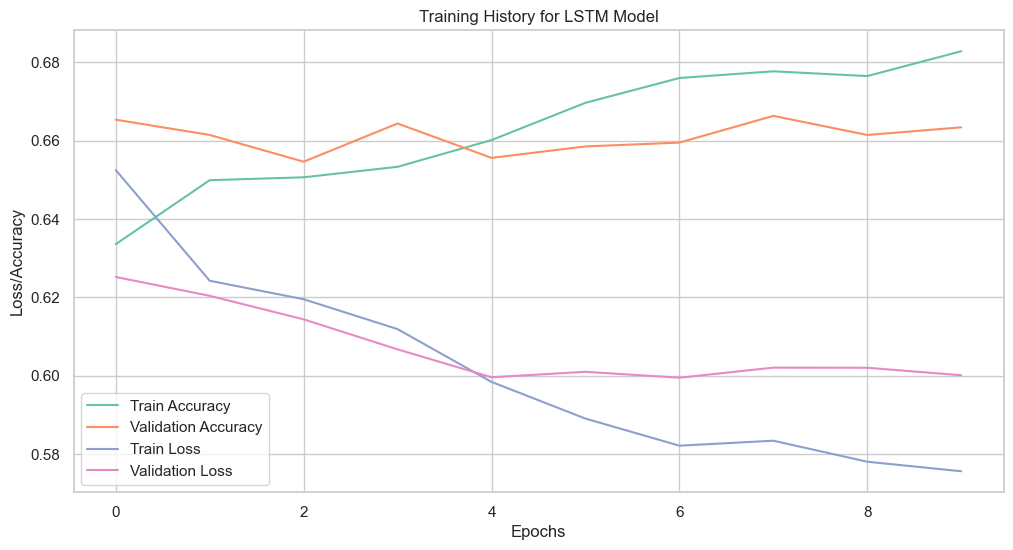

In [115]:
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# -----------------------------
# 3. Sort Data by state, district, year, and week_of_outbreak for proper sequencing
# -----------------------------

# Do NOT drop the columns we will use for sorting yet
df_sampled_sorted = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# -----------------------------
# 4. Drop unnecessary columns after sorting
# -----------------------------

# Now drop the unnecessary columns after sorting
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled_sorted.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled_sorted["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Reshape Data for LSTM (3D array: [samples, time_steps, features])
# -----------------------------

# Here, we'll use a time window of 3 days for LSTM input
time_steps = 3
X_seq = []
y_seq = []

# Create sequences from the data
for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])  # past 3 time steps as features
    y_seq.append(y.iloc[i])  # current step as target

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# -----------------------------
# 6. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# -----------------------------
# 7. Build LSTM Model
# -----------------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 8. Train the Model
# -----------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# -----------------------------
# 9. Evaluate the Model
# -----------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_prob = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 10. Plot Training History
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# -----------------------------
# 11. Feature Importance (for LSTM, this isn't as straightforward, but you can use SHAP or LIME)
# -----------------------------
# SHAP or LIME would need to be integrated here to interpret the LSTM model, 
# since LSTM is a black-box model in terms of direct feature importances.


Epoch 1/100
83/83 [==============================] - 4s 13ms/step - loss: 0.6845 - accuracy: 0.5555 - val_loss: 0.6668 - val_accuracy: 0.6269
Epoch 2/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6563 - accuracy: 0.6165 - val_loss: 0.6345 - val_accuracy: 0.6315
Epoch 3/100
83/83 [==============================] - 1s 6ms/step - loss: 0.6330 - accuracy: 0.6271 - val_loss: 0.6150 - val_accuracy: 0.6337
Epoch 4/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6222 - accuracy: 0.6322 - val_loss: 0.6087 - val_accuracy: 0.6383
Epoch 5/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6171 - accuracy: 0.6358 - val_loss: 0.6071 - val_accuracy: 0.6360
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 0.6170 - accuracy: 0.6351 - val_loss: 0.6060 - val_accuracy: 0.6360
Epoch 7/100
83/83 [==============================] - 0s 6ms/step - loss: 0.6149 - accuracy: 0.6383 - val_loss: 0.6050 - val_accuracy: 0.6360
Epoch 8/100


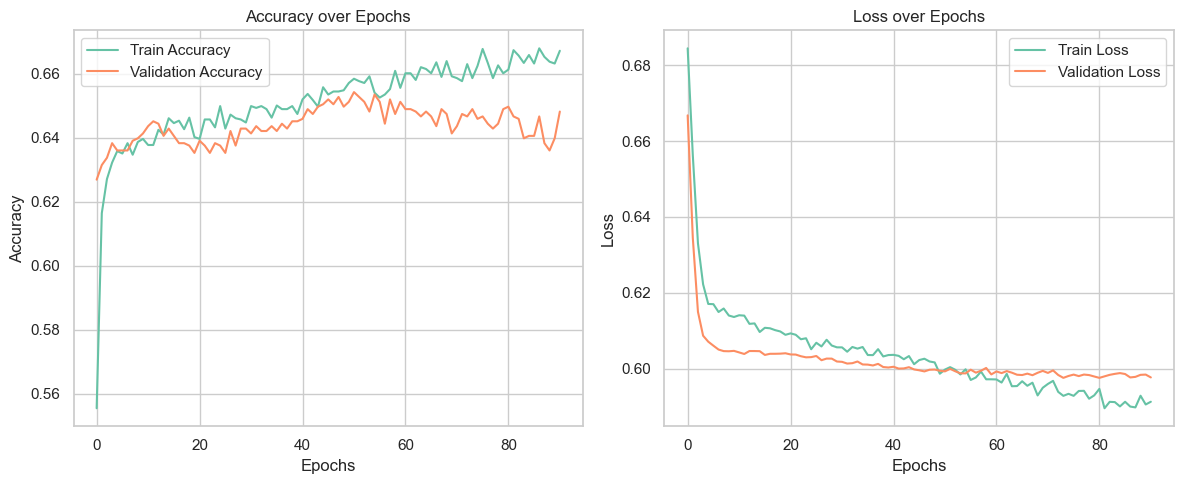

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 2: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
#df_sampled_sorted = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Rescale after sorting to ensure we follow proper data temporal and spatial dependencies
X_sorted = df_sampled_sorted.drop(columns=drop_cols + ["diar_outbreak_flag"])
X_sorted_imputed = imputer.transform(X_sorted)
X_sorted_scaled = scaler.transform(X_sorted_imputed)

# Step 4: Balance the classes with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sorted_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Reshape the data for LSTM (LSTM expects 3D input)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 6: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test), 
                    callbacks=[early_stopping])

# Step 9: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 10: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Step 11: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
83/83 [==============================] - 4s 16ms/step - loss: 0.6946 - accuracy: 0.4992 - val_loss: 0.6942 - val_accuracy: 0.4962
Epoch 2/100
83/83 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6948 - val_accuracy: 0.4947
Epoch 3/100
83/83 [==============================] - 1s 9ms/step - loss: 0.6904 - accuracy: 0.5240 - val_loss: 0.6953 - val_accuracy: 0.4893
Epoch 4/100
83/83 [==============================] - 1s 10ms/step - loss: 0.6907 - accuracy: 0.5196 - val_loss: 0.6959 - val_accuracy: 0.4909
Epoch 5/100
83/83 [==============================] - 1s 10ms/step - loss: 0.6887 - accuracy: 0.5369 - val_loss: 0.6962 - val_accuracy: 0.4787
Epoch 6/100
83/83 [==============================] - 1s 10ms/step - loss: 0.6893 - accuracy: 0.5352 - val_loss: 0.6982 - val_accuracy: 0.4954
Epoch 7/100
83/83 [==============================] - 1s 11ms/step - loss: 0.6869 - accuracy: 0.5435 - val_loss: 0.6972 - val_accuracy: 0.4748
Epoch 8

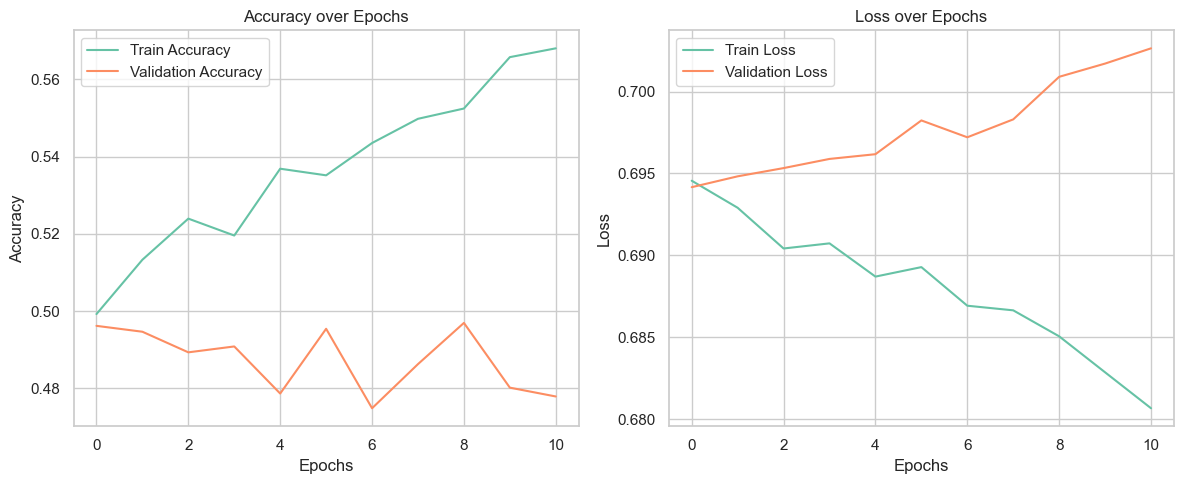

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Step 2: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 3: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Balance the classes with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 6: Reshape the data for LSTM (LSTM expects 3D input)
timesteps = 4  # Use previous 4 weeks as input for prediction
X_train_lstm = []
y_train_lstm = []
X_test_lstm = []
y_test_lstm = []

# Prepare the data in sequences of 4 weeks (timesteps = 4)
for i in range(timesteps, len(X_train)):
    X_train_lstm.append(X_train[i-timesteps:i])  # Last 4 weeks data (timesteps)
    y_train_lstm.append(y_train.iloc[i])  # Current week label

for i in range(timesteps, len(X_test)):
    X_test_lstm.append(X_test[i-timesteps:i])  # Last 4 weeks data (timesteps)
    y_test_lstm.append(y_test.iloc[i])  # Current week label

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Step 7: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 9: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
                    callbacks=[early_stopping])

# Step 10: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 11: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test_lstm, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_lstm, y_prob))

# Step 12: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
83/83 [==============================] - 8s 28ms/step - loss: 0.6938 - accuracy: 0.5033 - val_loss: 0.6936 - val_accuracy: 0.4996
Epoch 2/100
83/83 [==============================] - 2s 19ms/step - loss: 0.6927 - accuracy: 0.5176 - val_loss: 0.6935 - val_accuracy: 0.5027
Epoch 3/100
83/83 [==============================] - 1s 16ms/step - loss: 0.6927 - accuracy: 0.5119 - val_loss: 0.6939 - val_accuracy: 0.4928
Epoch 4/100
83/83 [==============================] - 2s 19ms/step - loss: 0.6929 - accuracy: 0.5060 - val_loss: 0.6939 - val_accuracy: 0.4950
Epoch 5/100
83/83 [==============================] - 2s 21ms/step - loss: 0.6922 - accuracy: 0.5218 - val_loss: 0.6945 - val_accuracy: 0.4996
Epoch 6/100
83/83 [==============================] - 2s 22ms/step - loss: 0.6910 - accuracy: 0.5168 - val_loss: 0.6973 - val_accuracy: 0.4867
Epoch 7/100
83/83 [==============================] - 2s 20ms/step - loss: 0.6900 - accuracy: 0.5239 - val_loss: 0.7015 - val_accuracy: 0.4798
Epoch 

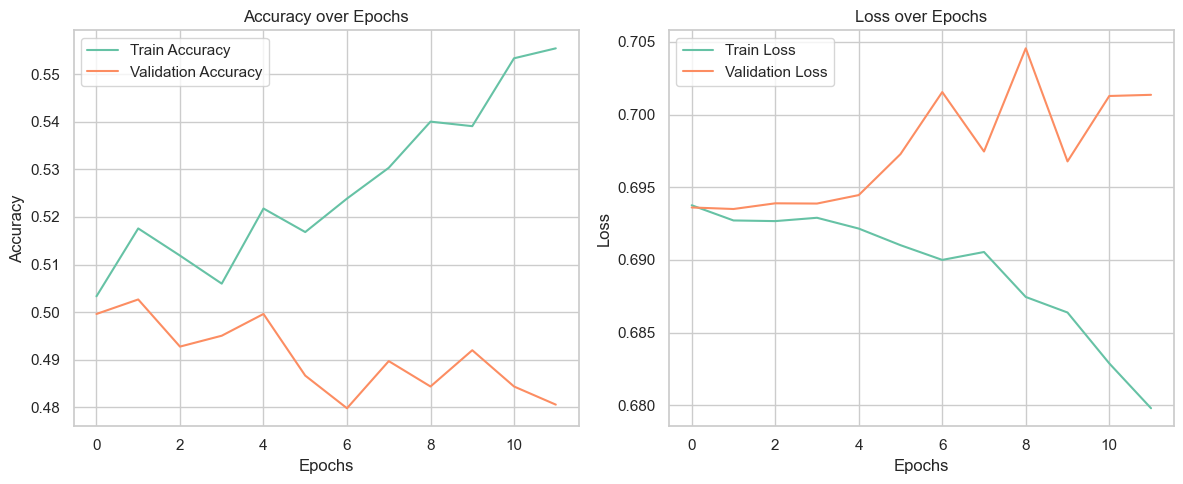

In [119]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_sampled.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_sampled['state_outbreak_rate'] = df_sampled['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_sampled.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_sampled['district_outbreak_rate'] = df_sampled.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

# Step 2: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 3: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Balance the classes with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 6: Reshape the data for LSTM (LSTM expects 3D input)
timesteps = 3  # Use previous 6 weeks as input for prediction (Increase timesteps)
X_train_lstm = []
y_train_lstm = []
X_test_lstm = []
y_test_lstm = []

# Prepare the data in sequences of 6 weeks (timesteps = 6)
for i in range(timesteps, len(X_train)):
    X_train_lstm.append(X_train[i-timesteps:i])  # Last 6 weeks data (timesteps)
    y_train_lstm.append(y_train.iloc[i])  # Current week label

for i in range(timesteps, len(X_test)):
    X_test_lstm.append(X_test[i-timesteps:i])  # Last 6 weeks data (timesteps)
    y_test_lstm.append(y_test.iloc[i])  # Current week label

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Step 7: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Increase dropout to prevent overfitting
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 9: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
                    callbacks=[early_stopping])

# Step 10: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 11: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test_lstm, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_lstm, y_prob))

# Step 12: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
